In [1]:
from google.colab import files
uploaded = files.upload()

Saving Combined Customers Data - Sheet1.csv to Combined Customers Data - Sheet1.csv


In [2]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Combined Customers Data - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Separate the labels (fraudulent or normal) from the input features
labels = data['FLAG']
input_features = data.drop(columns=['CUSTOMER', 'FLAG'])

# Replace non-numeric or null values with NaN in input features
input_features = input_features.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with zero
input_features = input_features.fillna(0)

# Stratified splitting of the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, labels, test_size=0.3, stratify=labels, random_state=42)

# Reshape the input data for CNN (add a channel dimension for grayscale images)
num_features = X_train.shape[1]
X_train_cnn = np.array(X_train).reshape(-1, num_features, 1)
X_test_cnn = np.array(X_test).reshape(-1, num_features, 1)

In [8]:
# Define the CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(num_features, 1), padding='same'))  # Add padding
    model.add(layers.MaxPooling1D(1))  # Change pool_size to 1
    model.add(layers.Conv1D(64, 3, activation='relu', padding='same'))  # Add padding
    model.add(layers.MaxPooling1D(1))  # Change pool_size to 1
    model.add(layers.Conv1D(128, 3, activation='relu', padding='same'))  # Add padding
    model.add(layers.MaxPooling1D(1))  # Change pool_size to 1
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))  # Add padding
    model.add(layers.MaxPooling1D(1))  # Change pool_size to 1
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))  # Add padding
    model.add(layers.MaxPooling1D(1))  # Change pool_size to 1
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification
    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 12, 32)            128       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 12, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 12, 64)            6208      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 12, 128)           24704     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 12, 128)         

Test Accuracy before training: 0.9629629850387573
Epoch 1/10
8/8 [==============================] - 1s 71ms/step - loss: 0.1374 - accuracy: 0.9841
Epoch 2/10
8/8 [==============================] - 1s 68ms/step - loss: 0.1273 - accuracy: 0.9841
Epoch 3/10
8/8 [==============================] - 1s 69ms/step - loss: 0.1197 - accuracy: 0.9841
Epoch 4/10
8/8 [==============================] - 1s 69ms/step - loss: 0.1318 - accuracy: 0.9802
Epoch 5/10
8/8 [==============================] - 1s 68ms/step - loss: 0.1278 - accuracy: 0.9762
Epoch 6/10
8/8 [==============================] - 1s 67ms/step - loss: 0.1793 - accuracy: 0.9762
Epoch 7/10
8/8 [==============================] - 1s 69ms/step - loss: 0.1578 - accuracy: 0.9722
Epoch 8/10
8/8 [==============================] - 1s 67ms/step - loss: 0.1969 - accuracy: 0.9643
Epoch 9/10
8/8 [==============================] - 1s 68ms/step - loss: 0.1072 - accuracy: 0.9881
Epoch 10/10
8/8 [==============================] - 1s 66ms/step - loss: 0.083

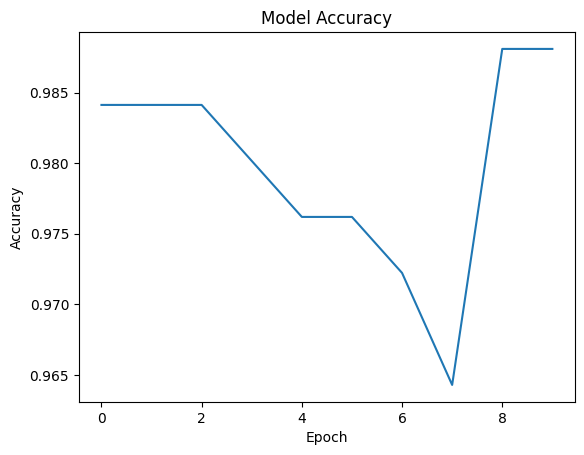

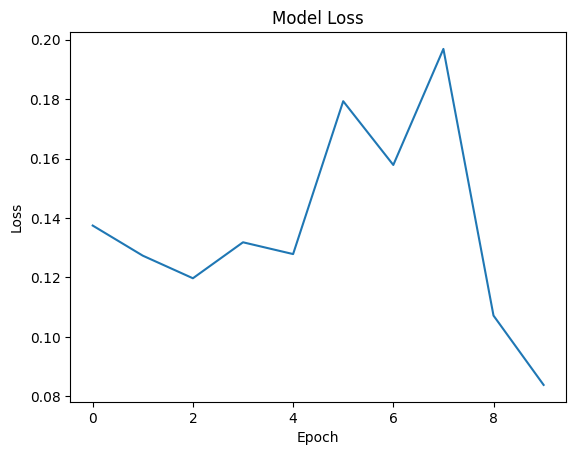

In [11]:
# Evaluate the model on the test data before training
test_loss_before, test_accuracy_before = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print("Test Accuracy before training:", test_accuracy_before)

# Train the model using the training data
history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot the accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()